## Первичный анализ данных

Ананикян Тигран  
Вариант 1 
База данных - https://archive.ics.uci.edu/dataset/45/heart+disease

### Цель работы

изучение программных средств для организации рабочего места специалиста по машинному обучению и анализу данных.

### Задачи 

 - получение программного доступа к данным, содержащимся в источниках различного типа;
 - выполнение предварительного анализа данных и получение обобщенных характеристик наборов данных;
 - исследование простых методов визуализации данных;
 - изучение основных библиотек Python для работы с данными.

#### Теоритеческая Информация 
Эта база данных содержит 76 атрибутов, но все опубликованные эксперименты относятся к использованию подмножества из 14 из них. В частности, база данных Кливленда - единственная, которую до сих пор использовали исследователи в области машинного обучения. Поле "goal" относится к наличию заболевания сердца у пациента. Его значение представляет собой целое число от 0 (отсутствие) до 4. Эксперименты с базой данных Кливленда фокусировались на попытках просто различить наличие (значения 1, 2, 3, 4) от отсутствия (значение 0).

Имена и социальные номера пациентов недавно были удалены из базы данных и заменены фиктивными значениями.

Эта база данных представляет собой медицинский датасет с информацией о пациентах и диагнозе заболеваний сердца. В ней содержится обширный список атрибутов, но для проведения экспериментов используется только подмножество из 14 ключевых атрибутов:

1. Возраст (age)
2. Пол (sex)
3. Тип боли в груди (cp)
4. Артериальное давление в покое (trestbps)
5. Уровень холестерина в крови (chol)
6. Уровень сахара в крови натощак (fbs)
7. Результаты покоя электрокардиографии (restecg)
8. Максимальная достигнутая частота сердечных сокращений (thalach)
9. Вызванная физической нагрузкой стенокардия (exang)
10. Депрессия ST, вызванная физической нагрузкой (oldpeak)
11. Наклон пика упражнения ST (slope)
12. Количество крупных сосудов, окрашенных при флюороскопии (ca)
13. Тип талассемии (thal)
14. Диагноз заболевания сердца (num) - предсказываемый атрибут

Полное описание атрибутов включает также информацию о социальных номерах, именах пациентов, и различных медицинских измерениях и тестах. Эксперименты сосредотачиваются на попытках выявить наличие или отсутствие заболевания сердца. 

In [1]:
import numpy as np
data_path = "./processed.cleveland.data"

In [2]:
data1 = np.genfromtxt(data_path, delimiter=",", dtype=None)
print('Shape of the dataset:', data1.shape)
print('Dataset type:', type(data1))
print('A single row of the dataset is type of:', type(data1[0]))
print('Types of elements:', type(data1[0][1]), type(data1[0][10]))
print('Dataset:')
print(data1)

Shape of the dataset: (303,)
Dataset type: <class 'numpy.ndarray'>
A single row of the dataset is type of: <class 'numpy.void'>
Types of elements: <class 'numpy.float64'> <class 'numpy.float64'>
Dataset:
[(63., 1., 1., 145., 233., 1., 2., 150., 0., 2.3, 3., b'0.0', b'6.0', 0)
 (67., 1., 4., 160., 286., 0., 2., 108., 1., 1.5, 2., b'3.0', b'3.0', 2)
 (67., 1., 4., 120., 229., 0., 2., 129., 1., 2.6, 2., b'2.0', b'7.0', 1)
 (37., 1., 3., 130., 250., 0., 0., 187., 0., 3.5, 3., b'0.0', b'3.0', 0)
 (41., 0., 2., 130., 204., 0., 2., 172., 0., 1.4, 1., b'0.0', b'3.0', 0)
 (56., 1., 2., 120., 236., 0., 0., 178., 0., 0.8, 1., b'0.0', b'3.0', 0)
 (62., 0., 4., 140., 268., 0., 2., 160., 0., 3.6, 3., b'2.0', b'3.0', 3)
 (57., 0., 4., 120., 354., 0., 0., 163., 1., 0.6, 1., b'0.0', b'3.0', 0)
 (63., 1., 4., 130., 254., 0., 2., 147., 0., 1.4, 2., b'1.0', b'7.0', 2)
 (53., 1., 4., 140., 203., 1., 2., 155., 1., 3.1, 3., b'0.0', b'7.0', 1)
 (57., 1., 4., 140., 192., 0., 0., 148., 0., 0.4, 2., b'0.0', b'6.

/var/folders/cn/109rk8k11jgfxmmjzw282t1w0000gn/T/ipykernel_20442/2366630308.py:1: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  data1 = np.genfromtxt(data_path, delimiter=",", dtype=None)


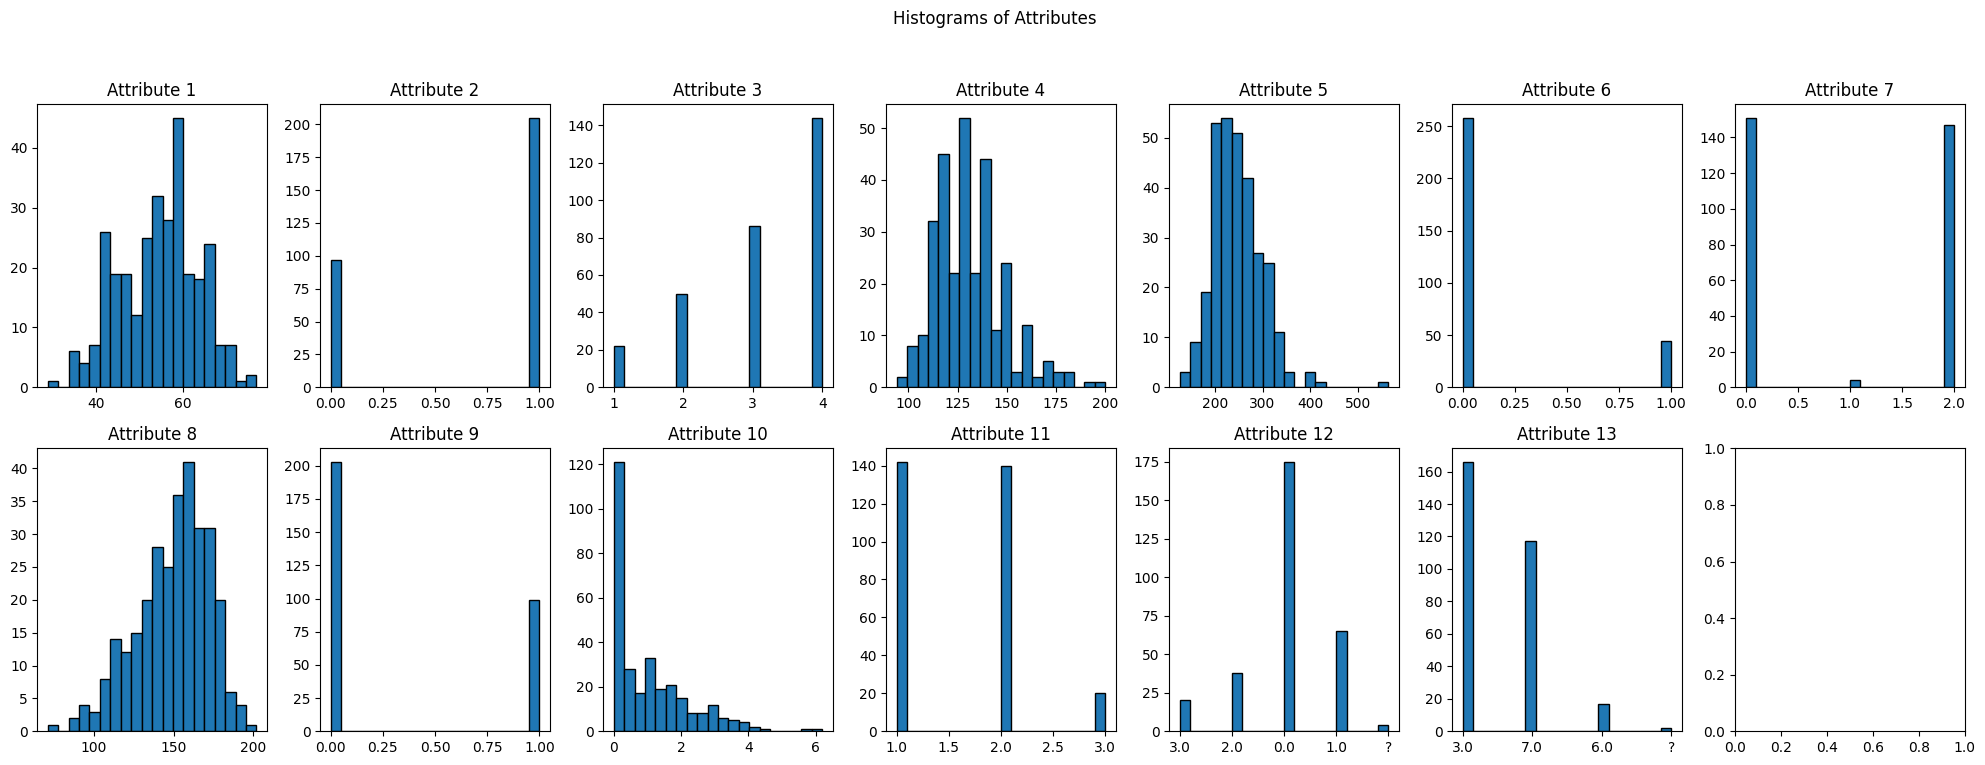

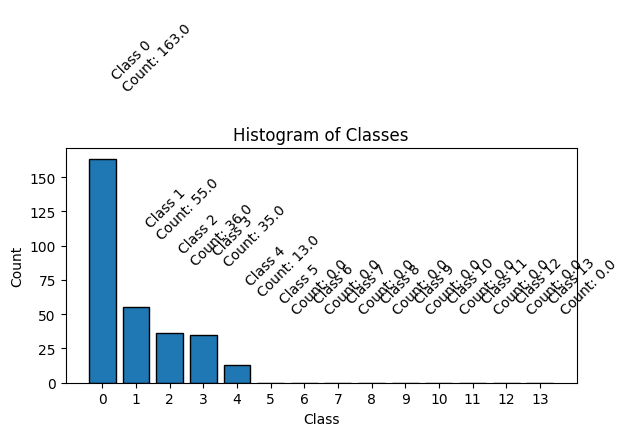

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Загружаем базу
data = pd.read_csv('./processed.cleveland.data')  # Предположим, что вы сохранили новую базу данных в файл с именем 'новая_база_данных.csv'

# Определяем столбец для класса
target_class = data.iloc[:, -1]

# Строим графики для атрибутов
num_attributes = data.shape[1] - 1  # Исключаем последний столбец (предсказываемый атрибут)
fig, axes = plt.subplots(2, 7, figsize=(20, 8))
fig.suptitle('Histograms of Attributes')

for i in range(num_attributes):
    row, col = divmod(i, 7)
    axes[row, col].hist(data.iloc[:, i], bins=20, edgecolor='black')
    axes[row, col].set_title(f'Attribute {i + 1}')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Строим график для классов
plt.figure()
hist, bins, _ = plt.hist(target_class, bins=range(15), align='left', rwidth=0.8, edgecolor='black')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(range(14))  # по условию 0-13
plt.title('Histogram of Classes')

# Подписываем название класса и количество результатов
for i in range(14):
    plt.annotate(f'Class {i}\nCount: {hist[i]}', xy=(i, 0), xytext=(i + 0.2, hist[i] + 50), rotation=45, fontsize=10)

plt.tight_layout()
plt.show()


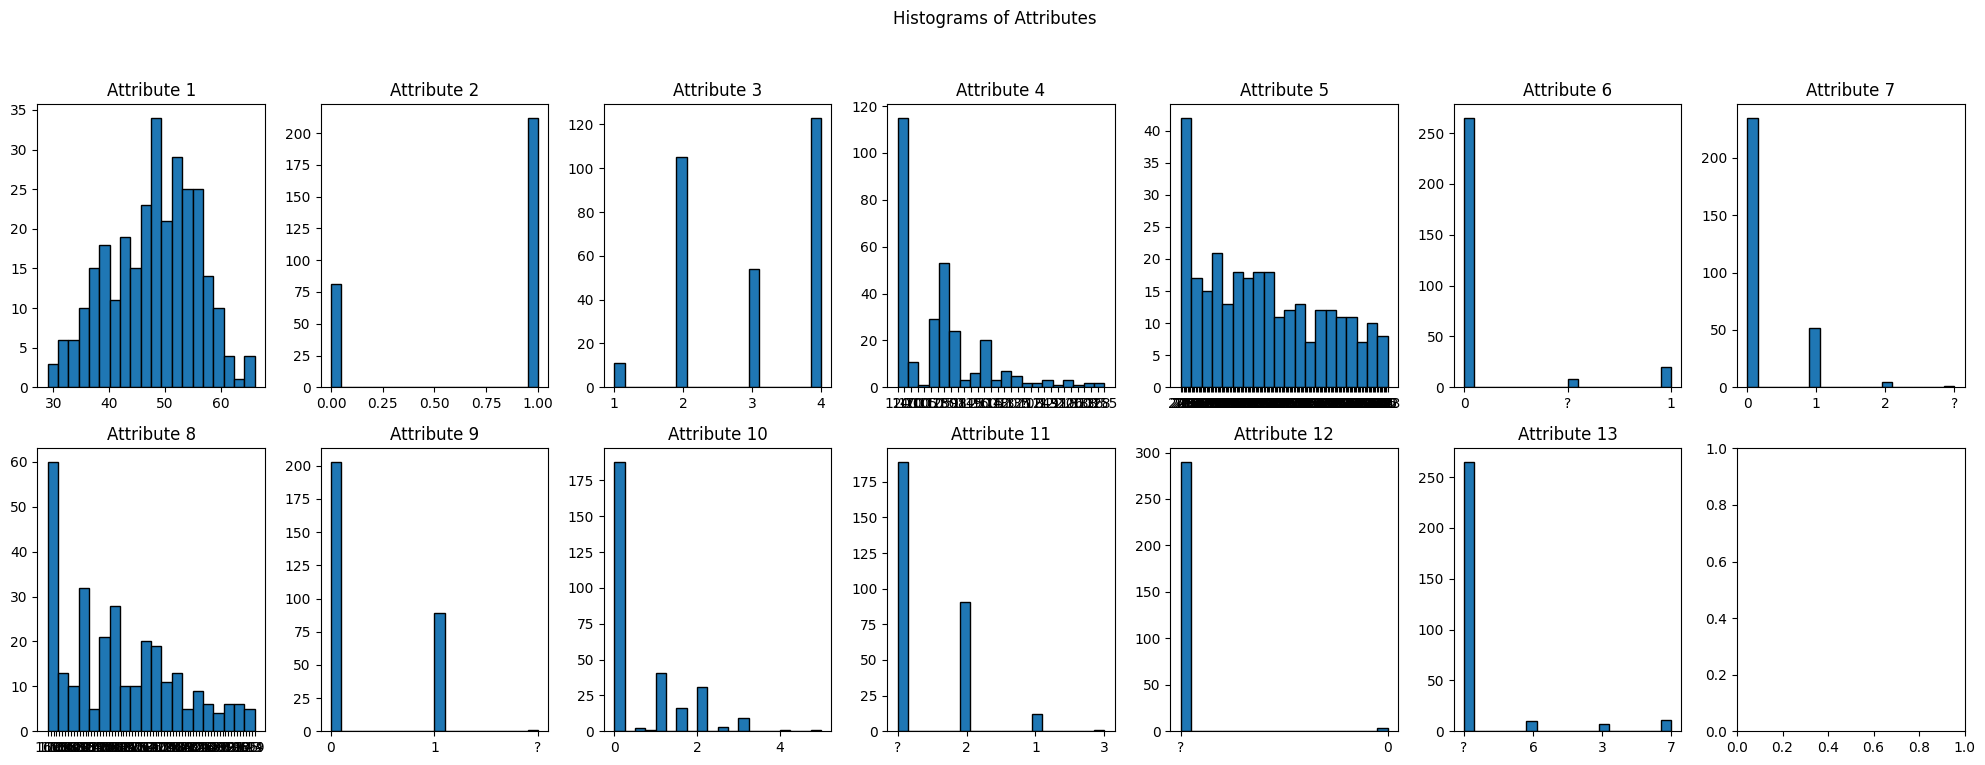

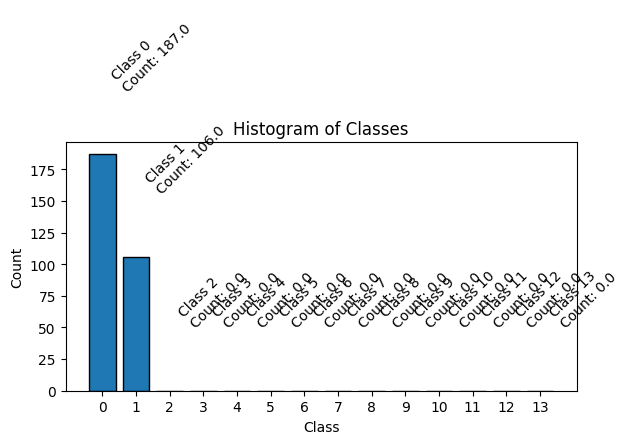

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Загружаем базу
data = pd.read_csv('./processed.hungarian.data')  # Предположим, что вы сохранили новую базу данных в файл с именем 'новая_база_данных.csv'

# Определяем столбец для класса
target_class = data.iloc[:, -1]

# Строим графики для атрибутов
num_attributes = data.shape[1] - 1  # Исключаем последний столбец (предсказываемый атрибут)
fig, axes = plt.subplots(2, 7, figsize=(20, 8))
fig.suptitle('Histograms of Attributes')

for i in range(num_attributes):
    row, col = divmod(i, 7)
    axes[row, col].hist(data.iloc[:, i], bins=20, edgecolor='black')
    axes[row, col].set_title(f'Attribute {i + 1}')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Строим график для классов
plt.figure()
hist, bins, _ = plt.hist(target_class, bins=range(15), align='left', rwidth=0.8, edgecolor='black')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(range(14))  # по условию 0-13
plt.title('Histogram of Classes')

# Подписываем название класса и количество результатов
for i in range(14):
    plt.annotate(f'Class {i}\nCount: {hist[i]}', xy=(i, 0), xytext=(i + 0.2, hist[i] + 50), rotation=45, fontsize=10)

plt.tight_layout()
plt.show()


# Контрольные вопросы

### Инструментальные средства для организации рабочего места специалиста Data Science:

 - Python: Основной язык программирования в области Data Science. Имеет богатый выбор библиотек для анализа данных, машинного обучения и визуализации.

 - Jupyter Notebook/JupyterLab: Интерактивная среда для создания и обмена документами, в которых можно выполнять код, делать заметки и визуализации.

 - IDE (Integrated Development Environment): Различные IDE, такие как PyCharm, Visual Studio Code, Spyder, предоставляют удобную среду для написания, тестирования и отладки кода.

 - Библиотеки анализа данных: Pandas, NumPy - для работы с данными и выполнения операций линейной алгебры.

 - Библиотеки визуализации данных: Matplotlib, Seaborn, Plotly - для создания информативных визуализаций.

 - Системы управления версиями: Git, GitHub - для контроля версий и совместной работы над проектами.

### Библиотеки Python для машинного обучения:

 - Scikit-Learn:
    Библиотека, предназначенная для обучения моделей машинного обучения. Включает в себя алгоритмы классификации, регрессии, кластеризации, а также инструменты для предобработки данных и оценки моделей.

 - TensorFlow:
    Фреймворк для глубокого обучения, разработанный Google. Позволяет строить и обучать нейронные сети, включая сверточные и рекуррентные.

 - Keras:
    Высокоуровневый API для работы с нейронными сетями, построенный поверх фреймворков, таких как TensorFlow и Theano. Облегчает создание и обучение моделей.

 - PyTorch:
    Фреймворк для глубокого обучения с открытым исходным кодом, разработанный Facebook. Имеет динамический вычислительный граф, что упрощает процесс экспериментирования и отладки моделей.

 - XGBoost:
    Реализация алгоритма градиентного бустинга. Используется для задач классификации, регрессии и ранжирования. Обеспечивает высокую производительность и эффективность.

 - NLTK (Natural Language Toolkit):
    Библиотека для обработки естественного языка, предназначенная для анализа текста и создания моделей обработки языка.

### Почему Python и его библиотеки широко распространены в машинном обучении:

 - Простота и читаемость кода: Python имеет простой и интуитивно понятный синтаксис, что упрощает разработку и поддержку кода.

 - Богатые библиотеки: Python имеет множество библиотек для анализа данных, машинного обучения, визуализации и других задач, что делает его мощным инструментом для специалистов Data Science.

 - Активное сообщество: Сообщество разработчиков Python активно работает над улучшением языка и его библиотек, предоставляя обновления, дополнения и поддержку.

 - Поддержка крупных организаций: Большие компании, такие как Google, Facebook, Microsoft, активно используют Python для разработки и исследований, поддерживая его развитие и распространение.